In [2]:
import re
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words_ger = stopwords.words("german")
stop_words_eng = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

url_eng = r'/content/drive/MyDrive/TextSent/df_eng_pp.csv'
df_eng_pp = pd.read_csv(url_eng)

url_trans = r'/content/drive/MyDrive/TextSent/translated_german_data.csv'
df_ger_trans = pd.read_csv(url_trans)

Mounted at /content/drive


In [4]:
df_eng_pp['text'] = df_eng_pp['text'].values.astype('U')
df_ger_trans['text'] = df_ger_trans['text'].values.astype('U')
df_ger_trans = df_ger_trans.drop_duplicates()

url_stop_ger = r'/content/drive/MyDrive/TextSent/german_stopwords_full.txt'

def load_stopwords(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        stopwords = [line.strip() for line in file]
    return stopwords

stopwords_file_path = url_stop_ger
german_stopwords = load_stopwords(stopwords_file_path)

stop_words_ger = stop_words_ger + german_stopwords

In [10]:
def preprocess_dataframe_ger(df):
    df['text'] = df['text'].str.lower().str.replace('<br /><br />', ' ')
    df['text'] = df['text'].str.replace('\s+', ' ', regex=True)
    df['text'] = df['text'].str.replace('[^\w\s]','', regex=True)
    return df

In [6]:

def preprocess_dataframe_eng(df):
    df['text'] = df['text'].str.lower().str.replace('<br /><br />', ' ')
    df['text'] = df['text'].str.replace('\s+', ' ', regex=True)
    df['text'] = df['text'].str.replace('[^\w\s]','', regex=True)
    pat = r'\b(?:{})\b'.format('|'.join(stop_words_eng))
    df['text'] = df['text'].str.replace(pat, '')
    return df

In [7]:
df_eng_pp = preprocess_dataframe_eng(df_eng_pp)

In [11]:
df_ger_trans = preprocess_dataframe_ger(df_ger_trans)

In [12]:
df_ger_trans['text'] = df_ger_trans['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_ger)]))

In [13]:
df_ger_aug = df_ger_trans

Word Clouds
________________________________________________________________________________________________________________________________________________________________________________________________

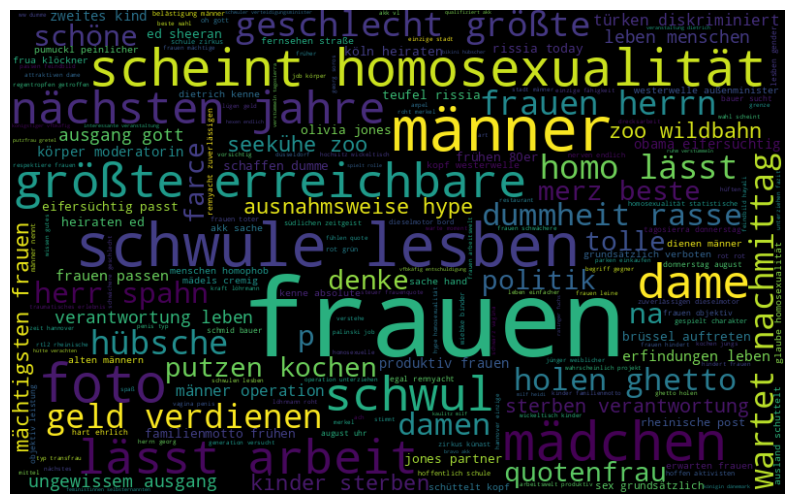

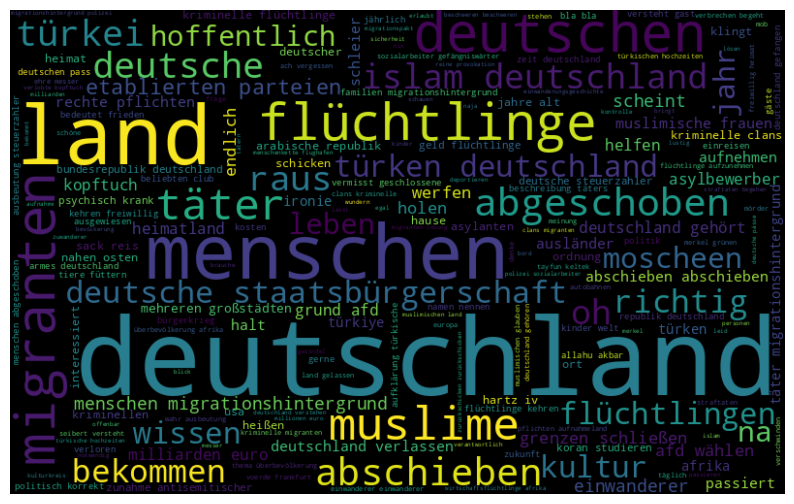

In [14]:
from wordcloud import WordCloud
df_ger_aug_sexist = df_ger_aug[df_ger_aug.sexist == True]
all_words = ' '.join([text for text in df_ger_aug_sexist["text"] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

df_ger_aug_racist = df_ger_aug[df_ger_aug.racist == True]
all_words = ' '.join([text for text in df_ger_aug_racist["text"] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


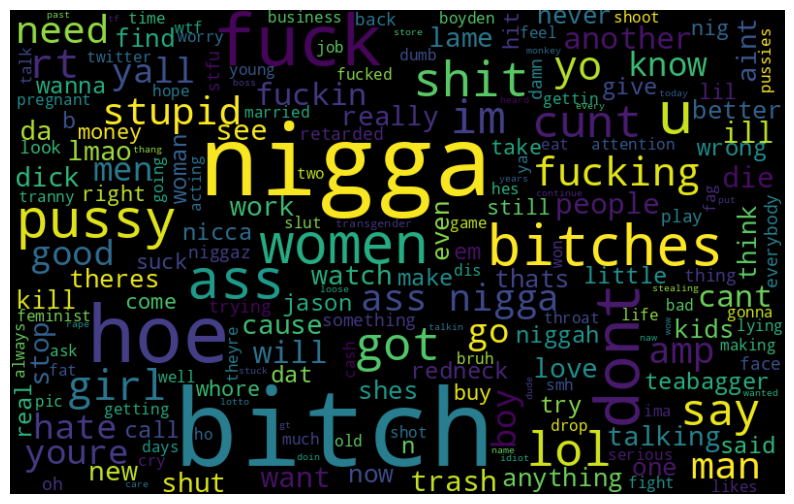

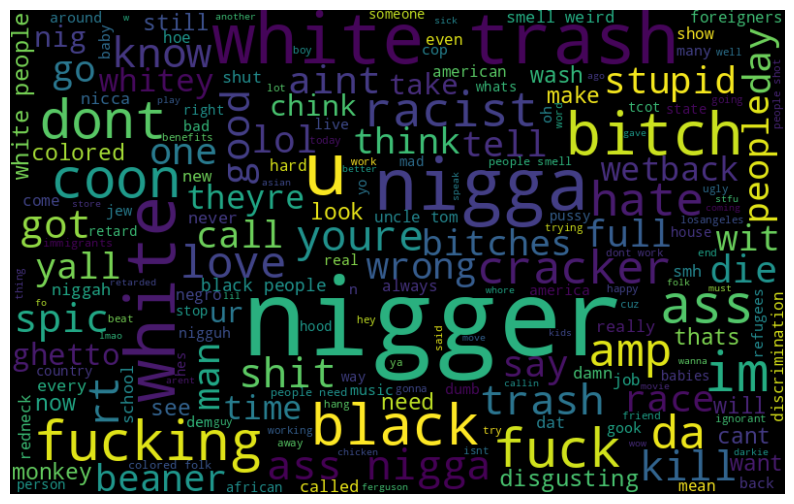

In [ ]:
df_eng_pp_sexist = df_eng_pp[df_eng_pp.sexist == True]
all_words = ' '.join([text for text in df_eng_pp_sexist["text"] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

df_eng_pp_racist = df_eng_pp[df_eng_pp.racist == True]
all_words = ' '.join([text for text in df_eng_pp_racist["text"] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
df_ger_aug = df_ger_aug.fillna(0)
df_ger_aug  = df_ger_aug.reset_index()

In [ ]:
from nltk.stem.cistem import Cistem


stemmer = Cistem()
wörter = df_ger_aug["text"]
wörter = wörter.apply(lambda x: x.split())

stemmed_words = wörter.apply(lambda x: [stemmer.stem(i) for i in x])

new_text = []
for i in range(len(stemmed_words)):
    new_text.append(' '.join(stemmed_words[i]))

df_ger_aug["text"] = new_text n

In [ ]:
from nltk.stem import PorterStemmer

porter_stemmer = PorterStemmer()
words = df_eng_pp["text"]
words = words.apply(lambda x: x.split())

stemmed_words = words.apply(lambda x: [porter_stemmer.stem(i) for i in x])

for i in range(len(stemmed_words)):
    stemmed_words[i] = ' '.join(stemmed_words[i])
    new_text= stemmed_words

print("Original words:", words)
print("Stemmed words:", stemmed_words)

df_eng_pp["text"] = new_text

Original words: 0       [krazy, i, dont, always, get, drunk, and, pass...
1       [white, kids, favorite, activities, calling, p...
2       [maam, did, you, clear, that, tweet, with, the...
3       [wth, is, that, playing, missy, i, mean, serio...
4       [he, promised, to, stand, with, the, muzzies, so]
                              ...                        
6674    [happy, morning, 8degree, with, anna, classmat...
6675    [i, dont, work, this, hard, so, that, those, h...
6676                          [britain, without, muslims]
6677                [refugees, must, leave, our, country]
6678    [have, my, lover, stop, being, angry, at, me, ...
Name: text, Length: 6679, dtype: object
Stemmed words: 0       krazi i dont alway get drunk and pass out but ...
1       white kid favorit activ call peopl nigger on x...
2       maam did you clear that tweet with the care th...
3       wth is that play missi i mean serious rt repub...
4                    he promis to stand with the muzzi so
 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf_eng = tfidf_vectorizer.fit_transform(df_eng_pp["text"] )
tfidf_eng

tfidf_aug = tfidf_vectorizer.fit_transform(df_ger_aug["text"] )
tfidf_aug


<6679x3364 sparse matrix of type '<class 'numpy.float64'>'
	with 79113 stored elements in Compressed Sparse Row format>

In [ ]:
df_ger_aug['multi'] = 0
df_ger_aug.loc[df_ger_aug['racist'] == 1, 'multi'] = 1
df_ger_aug.loc[df_ger_aug['sexist'] == 1, 'multi'] = 2


In [ ]:
df_eng_pp['multi'] = 0
df_eng_pp.loc[df_eng_pp['racist'] == 1, 'multi'] = 1
df_eng_pp.loc[df_eng_pp['sexist'] == 1, 'multi'] = 2

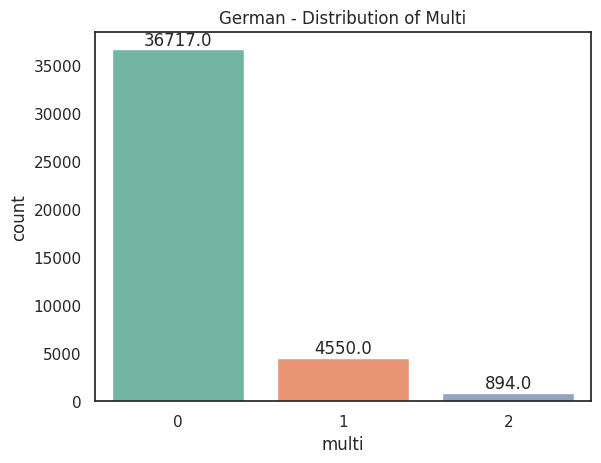

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot of the 'multi' column
sns.countplot(x='multi', data=df_ger_aug, palette='Set2')

for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                   str(bar.get_height()), ha='center', va='bottom')

plt.title('German - Distribution of Multi')
plt.show()


In [ ]:
X = tfidf_eng
y = df_eng_pp['multi'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1437
           1       0.84      0.39      0.53       133
           2       0.77      0.33      0.46       100

    accuracy                           0.90      1670
   macro avg       0.84      0.57      0.65      1670
weighted avg       0.90      0.90      0.89      1670



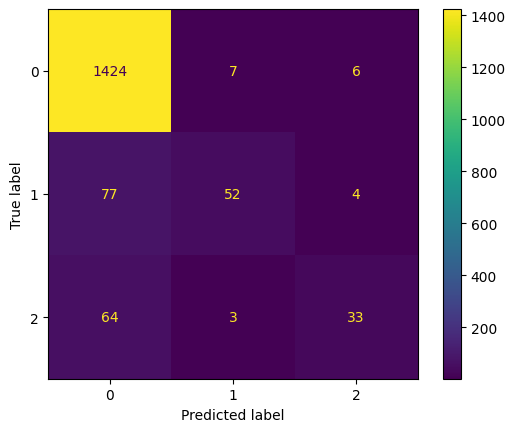

In [ ]:
model = LogisticRegression().fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
confusion_matrix = metrics.confusion_matrix(y_test,y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1437
           1       0.81      0.54      0.65       133
           2       0.70      0.40      0.51       100

    accuracy                           0.91      1670
   macro avg       0.81      0.64      0.70      1670
weighted avg       0.90      0.91      0.90      1670



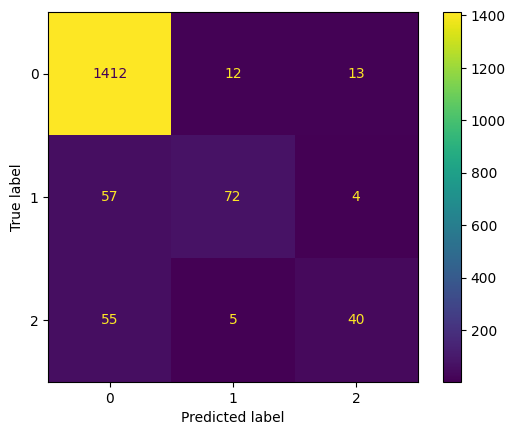

In [ ]:
model =  RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
report = classification_report( y_test, y_pred )
print(report)
acc=accuracy_score(y_test,y_pred)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1437
           1       0.68      0.69      0.69       133
           2       0.60      0.71      0.65       100

    accuracy                           0.91      1670
   macro avg       0.75      0.78      0.76      1670
weighted avg       0.92      0.91      0.91      1670



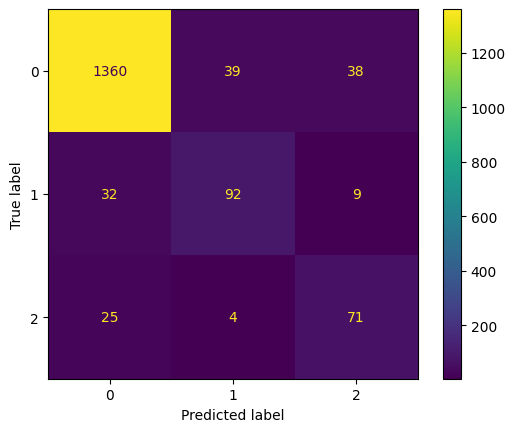

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import class_weight
# Prepare class weights
regular_classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y= y_train
)
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.05,
                                 max_depth=7, random_state=0)


model.fit(X_train, y_train, sample_weight=regular_classes_weights)
y_pred = model.predict(X_test)
report = classification_report( y_test, y_pred)
print(report)
acc=accuracy_score(y_test,y_pred)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1437
           1       0.84      0.55      0.66       133
           2       0.73      0.43      0.54       100

    accuracy                           0.92      1670
   macro avg       0.83      0.66      0.72      1670
weighted avg       0.91      0.92      0.91      1670



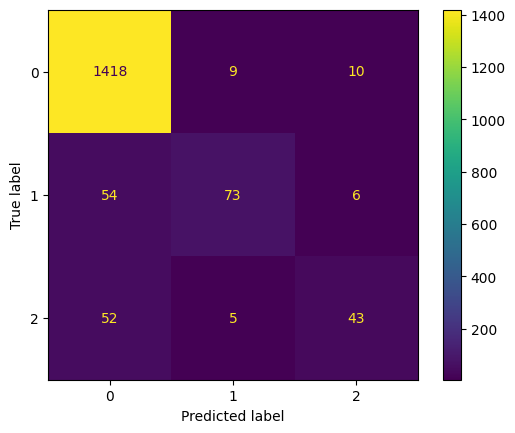

In [ ]:
from sklearn import metrics

# Initialize the Support Vector Classifier
svm = SVC(kernel='linear')

# Fit the classifier on the training data
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
report = classification_report( y_test, y_pred )
print(report)
acc=accuracy_score(y_test,y_pred)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()